## Î™®Îìà Ï∂îÍ∞Ä
----- 

In [1]:
import cv2, os
import matplotlib.pyplot as plt
import numpy as np
import dlib

## ÏñºÍµ¥Ïù∏ÏãùÌïòÍ∏∞
------


### ÏñºÍµ¥ Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞

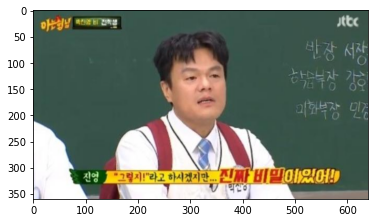

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/jyp1.jpg'
img_bgr = cv2.imread(my_image_path,cv2.IMREAD_UNCHANGED)    #- OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÏñ¥ÏÑú
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360Ïùò ÌÅ¨Í∏∞Î°ú Resize
img_show = img_bgr.copy()      #- Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄ Î≥ÑÎèÑ Î≥¥Í¥Ä
img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

# Ïù¥ÎØ∏ÏßÄ RGBÎ°ú Î≥ÄÍ≤Ω 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_show) 
plt.show()

### Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏñºÍµ¥Ïù∏ÏãùÌïòÍ∏∞

In [3]:
detector_hog = dlib.get_frontal_face_detector()

rectangles[[(270, 92) (378, 199)]]


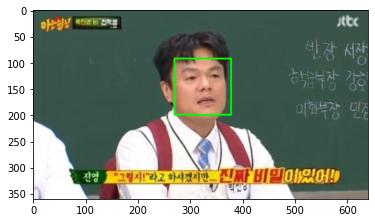

In [4]:
dlib_rects = detector_hog(img_show, 1)

print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show,(l,t), (r,b), (0, 255,0), 2, lineType=cv2.LINE_AA)
    
plt.imshow(img_show)
plt.show()

### face landmark Î™®Îç∏ Ï∂îÍ∞Ä

In [5]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("üå´üõ∏")

üå´üõ∏


### face landmark ÏÉùÏÑ± Î∞è ÌëúÌòÑ

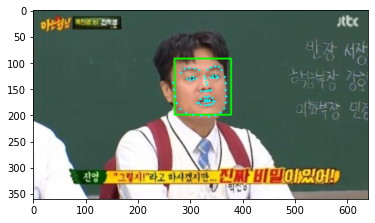

68


In [6]:
list_landmarks = []
# ÏÇ¨ÏßÑÏóêÏÑú ÏñºÍµ¥ Ïù∏ÏãùÌïòÏó¨ ÎûúÎìúÎßàÌÅ¨ Ï¢åÌëú ÏÉùÏÑ±
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_show, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

# ÏÉùÏÑ±Îêú ÎûúÎìúÎßàÌÅ¨Î•º ÏÇ¨ÏßÑ ÏúÑÏóê ÌëúÌòÑ
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

plt.imshow(img_show)
plt.show()    
print(len(list_landmarks[0]))

#### ÎûúÎìúÎßàÌÅ¨Ïùò Î≤àÌò∏Î≥Ñ ÏúÑÏπò

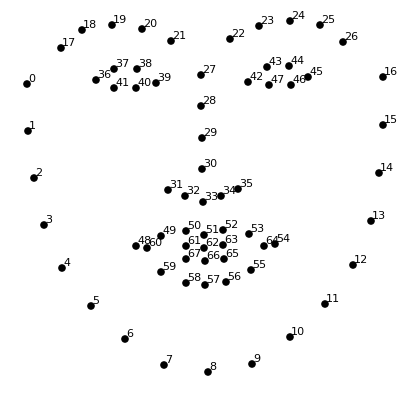

### Ïä§Ìã∞Ïª§ Ìï©ÏÑ±Ïóê ÏÇ¨Ïö©Îê† ÎûúÎìúÎßàÌÅ¨ ÏßÄÏ†ï 

In [7]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    # Ïù¥ÎØ∏ÏßÄ Îì§Ïñ¥Í∞à ÎûúÎìúÎßàÌÅ¨
    x_nose = landmark[33][0]
    y_nose = landmark[33][1]
    x_right = landmark[14][0]
    y_bottom = landmark[8][1]
    
    print(f'x_nose, y_nose: {x_nose, y_nose}')
    print(f'(x_right): {x_right }')
    print(f'(y_bottm): {y_bottom}')

x_nose, y_nose: (332, 154)
(x_right): 368
(y_bottm): 202


## Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÏóêÏÑú Î∞∞Í≤Ω Ï†úÍ±∞ ÌõÑ Ìï©ÏÑ±ÌïòÍ∏∞
-----

### Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Î°úÎìú

In [8]:
# Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers2.png'
img_sticker = cv2.imread(sticker_path)

# Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Î¶¨ÏÇ¨Ïù¥Ïßï
half_x , half_y = x_right - x_nose, y_bottom - y_nose # ÏΩî ÎÅùÍ≥º x Ïò§Î•∏Ï™Ω ÎÅù, y ÏïÑÎûòÏ™Ω ÎÅù ÏÇ¨Ïù¥Ïùò Í∞ÑÍ≤©Ïù¥ Ïù¥ÎØ∏ÏßÄ Í∞ÄÎ°ú,ÏÑ∏Î°úÏùò Ï†àÎ∞òÏù¥ Îê®
print(half_y, half_x)
img_sticker = cv2.resize(img_sticker, (half_x * 2, half_y * 2)) # ÏñºÍµ¥ Ïù∏Ïãù ÏòÅÏó≠Ïóê ÎßûÏ∂∞ÏÑú Ïä§Ìã∞Ïª§ÌÅ¨Í∏∞ Ï°∞Ï†ï
plt.imshow(img_sticker)
plt.show()

48 36


> Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º Î¶¨ÏÇ¨Ïù¥Ïßï Ìï† Îïå **ÏΩîÎÅùÏù¥ Ìï©ÏÑ±Îê† Ïù¥ÎØ∏ÏßÄÏùò Ï†ïÏ§ëÏïô**Ïóê ÏúÑÏπòÌïòÍ≤å ÌïòÍ∏∞ ÏúÑÌï¥
**rectangle.right() - ÏΩîÏùò xÏ¢åÌëú**, ÌÑ±ÎÅùÏù∏ **ÎûúÎìúÎßàÌÅ¨ 8Î≤àÏùò yÏ¢åÌëú - ÏΩîÏùò yÏ¢åÌëú** Î•º Ìïú ÌõÑ
Í∞ÅÍ∞ÅÏùò Í∞íÏùÑ **2Î∞∞**ÌïòÏó¨ **Ìï©ÏÑ±Îê† Ïù¥ÎØ∏ÏßÄÏùò x,yÏ†ÑÏ≤¥ Í∏∏Ïù¥Î°ú ÏÑ§Ï†ï**ÌïòÏòÄÎã§.

### Ïä§Ìã∞Ïª§ ÏòÅÏó≠ ÏÑ§Ï†ï

In [9]:
# sticker_area ÏÑ§Ï†ï: y,xÏàú
refind_y_top = y_nose - half_y # ÏΩîÏùò xÏ¢åÌëúÏóêÏÑú ÏïûÏÑú Íµ¨Ìïú Ìï©ÏÑ±Îê† Ïù¥ÎØ∏ÏßÄÏùò xÏ∂ï Ï†àÎ∞òÏùò Í∏∏Ïù¥Î•º ÎπºÏÑú xÏ¢åÌëú ÏõêÏ†êÏùÑ Íµ¨ÌïúÎã§.
refind_y_bottom = refind_y_top + img_sticker.shape[0] 
refind_x_left = x_nose - half_x # ÏΩîÏùò xÏ¢åÌëúÏóêÏÑú ÏïûÏÑú Íµ¨Ìïú Ìï©ÏÑ±Îê† Ïù¥ÎØ∏ÏßÄÏùò yÏ∂ï Ï†àÎ∞òÏùò Í∏∏Ïù¥Î•º ÎπºÏÑú yÏ¢åÌëú ÏõêÏ†êÏùÑ Íµ¨ÌïúÎã§.
refind_x_right = refind_x_left + img_sticker.shape[1]
print(f'(refind_x_left,right): {refind_x_left, refind_x_right }')
print(f'(refind_y_top,bottm): {refind_y_top, refind_y_bottom}')

# img_rgbÏóêÏÑú stickerÍ∞Ä Î∂ôÏùÑ ÏòÅÏó≠ ÏßÄÏ†ïÌïòÍ∏∞
sticker_area = img_rgb[refind_y_top:refind_y_bottom, refind_x_left:refind_x_right]
print('sticker_area')
plt.imshow(sticker_area)
plt.show()

(refind_x_left,right): (296, 368)
(refind_y_top,bottm): (106, 202)
sticker_area


### Ïä§Ìã∞Ïª§Ïù¥ÎØ∏ÏßÄÏùò Î∞∞Í≤Ω Ï†úÍ±∞ÌõÑ Ïä§Ìã∞Ïª§ ÏòÅÏó≠Ïóê Ìï©ÏπòÍ∏∞
* [gramman 0.1 documentation - Ïù¥ÎØ∏ÏßÄÏó∞ÏÇ∞](https://opencv-python.readthedocs.io/en/latest/doc/07.imageArithmetic/imageArithmetic.html) Ï∞∏Ï°∞
 

sticker_area


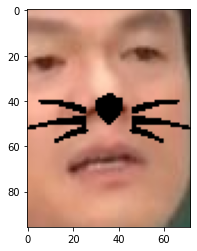

In [10]:
#maskÎ•º ÎßåÎì§Í∏∞ ÏúÑÌï¥ÏÑú img1ÏùÑ grayÎ°ú Î≥ÄÍ≤Ω ÌõÑ, 
mask = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2GRAY)
#ret, mask = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

#angle = math.atan(h/w)/math.pi*180
#mask

#bitwise_and Ïó∞ÏÇ∞ÏûêÎäî ÎëòÎã§ 0Ïù¥ ÏïÑÎãå Í≤ΩÏö∞Îßå Í∞íÏùÑ ÌÜµÍ≥º ÏãúÌÇ¥.
#Ï¶â maskÍ∞Ä Í≤ÄÏ†ïÏÉâÏù¥ ÏïÑÎãå Í≤ΩÏö∞Îßå ÌÜµÍ≥ºÍ∞Ä ÎêòÍ∏∞ÎïåÎ¨∏Ïóê maskÏòÅÏó≠ Ïù¥Ïô∏Îäî Î™®Îëê Ï†úÍ±∞Îê®.
sticker_area = cv2.bitwise_and(sticker_area, sticker_area, mask=mask)

print('sticker_area')
plt.imshow(sticker_area)
plt.show()

### Ïä§Ìã∞Ïª§ ÏòÅÏó≠ÏùÑ ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏóê Ìï©ÏπòÍ∏∞

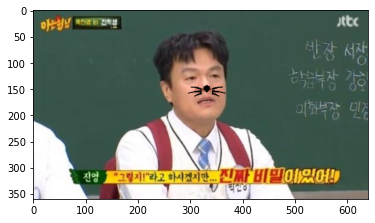

In [11]:
img_rgb[refind_y_top:refind_y_bottom, refind_x_left:refind_x_right] = np.where(sticker_area == 1, sticker_area, sticker_area).astype(np.uint8)
plt.imshow(img_rgb)
plt.show()

## Îã§Î•∏ Ï°∞Í±¥ÏúºÎ°ú ÌÖåÏä§Ìä∏
-----

### 1. Î∞òÎåÄÎ∞©Ìñ•Ïùò ÏñºÍµ¥

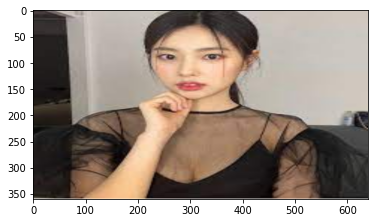

In [12]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/hyemmu2.jpeg'
img_bgr = cv2.imread(my_image_path,cv2.IMREAD_UNCHANGED)    #- OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÏñ¥ÏÑú
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360Ïùò ÌÅ¨Í∏∞Î°ú Resize
img_show_hyem = img_bgr.copy()      #- Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄ Î≥ÑÎèÑ Î≥¥Í¥Ä
img_show_hyem = cv2.cvtColor(img_show_hyem, cv2.COLOR_BGR2RGB)

# Ïù¥ÎØ∏ÏßÄ RGBÎ°ú Î≥ÄÍ≤Ω 
img_rgb_hyem = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_show_hyem) 
plt.show()

rectangles[[(225, 53) (354, 182)]]


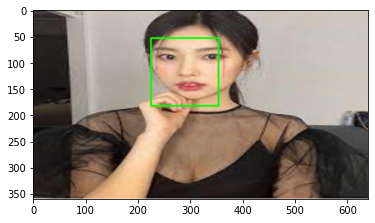

In [13]:
dlib_rects_hyem = detector_hog(img_show_hyem, 1)

print(dlib_rects_hyem)

for dlib_rect in dlib_rects_hyem:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show_hyem,(l,t), (r,b), (0, 255,0), 2, lineType=cv2.LINE_AA)
    
plt.imshow(img_show_hyem)
plt.show()

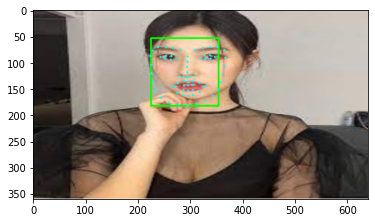

In [14]:
list_landmarks_hyem = []
# ÏÇ¨ÏßÑÏóêÏÑú ÏñºÍµ¥ Ïù∏ÏãùÌïòÏó¨ ÎûúÎìúÎßàÌÅ¨ Ï¢åÌëú ÏÉùÏÑ±
for dlib_rect in dlib_rects_hyem:
    points = landmark_predictor(img_show_hyem, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks_hyem.append(list_points)

# ÏÉùÏÑ±Îêú ÎûúÎìúÎßàÌÅ¨Î•º ÏÇ¨ÏßÑ ÏúÑÏóê ÌëúÌòÑ
for landmark in list_landmarks_hyem:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show_hyem, point, 2, (0, 255, 255), -1) # yellow

plt.imshow(img_show_hyem)
plt.show()

x_nose, y_nose: (294, 128)
(x_right): 362
(y_bottm): 181
53 68


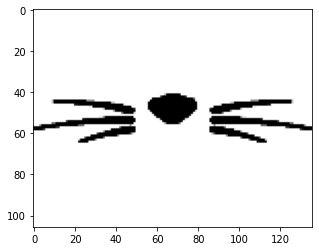

(refind_x_left,right): (226, 362)
(refind_y_top,bottm): (75, 181)
sticker_area


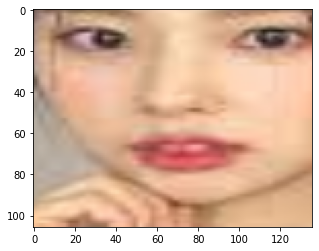

(96, 72, 3)


In [15]:
# Ïù¥ÎØ∏ÏßÄ Ìï©ÏÑ±Ïóê ÏÇ¨Ïö©Îê† ÎûúÎìúÎßàÌÅ¨ ÏßÄÏ†ï
for dlib_rects_hyem, list_landmarks_hyem  in zip(dlib_rects_hyem, list_landmarks_hyem):
    # Ïù¥ÎØ∏ÏßÄ Îì§Ïñ¥Í∞à ÎûúÎìúÎßàÌÅ¨
    x_nose = landmark[33][0]
    y_nose = landmark[33][1]
    x_right = landmark[14][0]
    y_bottom = landmark[8][1]
    
    print(f'x_nose, y_nose: {x_nose, y_nose}')
    print(f'(x_right): {x_right }')
    print(f'(y_bottm): {y_bottom}')

# Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers2.png'
img_sticker = cv2.imread(sticker_path)
    
# Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Î¶¨ÏÇ¨Ïù¥Ïßï
half_x , half_y = x_right - x_nose, y_bottom - y_nose # ÏΩî ÎÅùÍ≥º x Ïò§Î•∏Ï™Ω ÎÅù, y ÏïÑÎûòÏ™Ω ÎÅù ÏÇ¨Ïù¥Ïùò Í∞ÑÍ≤©Ïù¥ Ïù¥ÎØ∏ÏßÄ Í∞ÄÎ°ú,ÏÑ∏Î°úÏùò Ï†àÎ∞òÏù¥ Îê®
print(half_y, half_x)
img_sticker = cv2.resize(img_sticker, (half_x * 2, half_y * 2)) # ÏñºÍµ¥ Ïù∏Ïãù ÏòÅÏó≠Ïóê ÎßûÏ∂∞ÏÑú Ïä§Ìã∞Ïª§ÌÅ¨Í∏∞ Ï°∞Ï†ï
plt.imshow(img_sticker)
plt.show()
    
# sticker_area ÏÑ§Ï†ï: y,xÏàú
refind_y_top = y_nose - half_y
refind_y_bottom = refind_y_top + img_sticker.shape[0] 
refind_x_left = x_nose - half_x
refind_x_right = refind_x_left + img_sticker.shape[1]
print(f'(refind_x_left,right): {refind_x_left, refind_x_right }')
print(f'(refind_y_top,bottm): {refind_y_top, refind_y_bottom}')

# img_rgbÏóêÏÑú stickerÍ∞Ä Î∂ôÏùÑ ÏòÅÏó≠ ÏßÄÏ†ïÌïòÍ∏∞
sticker_area_hyem = img_rgb_hyem[refind_y_top:refind_y_bottom, refind_x_left:refind_x_right]
print('sticker_area')
plt.imshow(sticker_area_hyem)
plt.show()
print(sticker_area.shape)

sticker_area_hyem


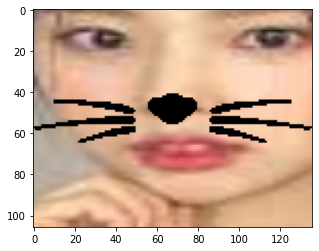

In [17]:
#maskÎ•º ÎßåÎì§Í∏∞ ÏúÑÌï¥ÏÑú img1ÏùÑ grayÎ°ú Î≥ÄÍ≤Ω
mask_hyem = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2GRAY)
#ret, mask_hyem = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)


#bitwise_and Ïó∞ÏÇ∞ÏûêÎäî ÎëòÎã§ 0Ïù¥ ÏïÑÎãå Í≤ΩÏö∞Îßå Í∞íÏùÑ ÌÜµÍ≥º ÏãúÌÇ¥.
#Ï¶â maskÍ∞Ä Í≤ÄÏ†ïÏÉâÏù¥ ÏïÑÎãå Í≤ΩÏö∞Îßå ÌÜµÍ≥ºÍ∞Ä ÎêòÍ∏∞ÎïåÎ¨∏Ïóê maskÏòÅÏó≠ Ïù¥Ïô∏Îäî Î™®Îëê Ï†úÍ±∞Îê®.
sticker_area_hyem = cv2.bitwise_and(sticker_area_hyem, sticker_area_hyem, mask=mask_hyem)

print('sticker_area_hyem')
plt.imshow(sticker_area_hyem)
plt.show()

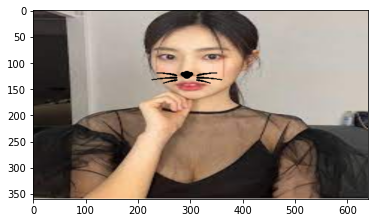

In [18]:
img_rgb_hyem[refind_y_top:refind_y_bottom, refind_x_left:refind_x_right] = np.where(sticker_area_hyem == 1, sticker_area_hyem, sticker_area_hyem).astype(np.uint8)
plt.imshow(img_rgb_hyem)
plt.show()

> rectangleÏùò ÏòÅÏó≠Ïù¥ Ïã§Ï†ú ÏñºÍµ¥Î≥¥Îã§ Ï¢ÅÍ≤å Ïù∏ÏãùÎêòÏñ¥ Ïù¥ÎØ∏ÏßÄÏùò xÏ∂ïÏù¥ Ï§ÑÏñ¥Îì§ÏóàÏúºÎÇò, ÎûúÎìúÎßàÌÅ¨Î•º ÏÇ¨Ïö©Ìïú Ï¢åÌëúÏÑ§Ï†ïÏùÄ Ïûò ÎèôÏûëÌïòÏòÄÎã§.

### 2. Í∏∞Ïö∏Ïñ¥ÏßÑ ÏñºÍµ¥ + ÌÅ¥Î°úÏ¶à ÏïÑÏõÉ

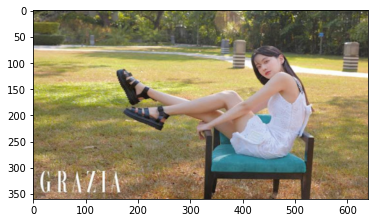

In [19]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/Ohyeon1.jpg'
img_bgr = cv2.imread(my_image_path,cv2.IMREAD_UNCHANGED)    #- OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÏñ¥ÏÑú
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360Ïùò ÌÅ¨Í∏∞Î°ú Resize
img_show_oh = img_bgr.copy()      #- Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄ Î≥ÑÎèÑ Î≥¥Í¥Ä
img_show_oh = cv2.cvtColor(img_show_oh, cv2.COLOR_BGR2RGB)

# Ïù¥ÎØ∏ÏßÄ RGBÎ°ú Î≥ÄÍ≤Ω 
img_rgb_oh = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_show_oh) 
plt.show()

rectangles[[(425, 94) (461, 130)]]


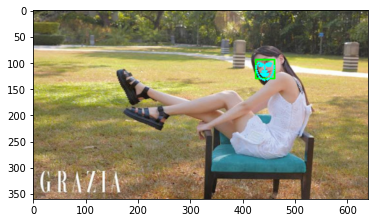

In [20]:
# ÏñºÍµ¥Ïù∏Ïãù
dlib_rects = detector_hog(img_show_oh, 1)

print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show_oh,(l,t), (r,b), (0, 255,0), 2, lineType=cv2.LINE_AA)
    
list_landmarks_oh = []

# ÏñºÍµ¥ ÎûúÎìúÎßàÌÅ¨ Ï¢åÌëú ÏÉùÏÑ±
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_show_hyem, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks_oh.append(list_points)

    
# ÏÉùÏÑ±Îêú ÎûúÎìúÎßàÌÅ¨Î•º ÏÇ¨ÏßÑ ÏúÑÏóê ÌëúÌòÑ    
for landmark in list_landmarks_oh:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show_oh, point, 2, (0, 255, 255), -1) # yellow

plt.imshow(img_show_oh)
plt.show()

x_nose, y_nose: (442, 117)
(x_right): 459
(y_bottm): 133
16 17


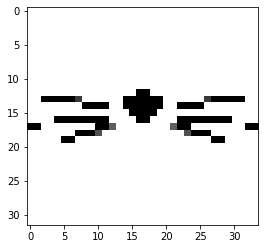

(refind_x_left,right): (425, 459)
(refind_y_top,bottm): (101, 133)
sticker_area


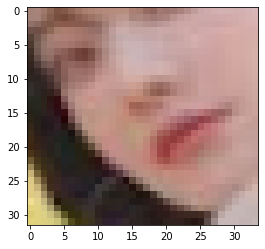

In [21]:
# Ïù¥ÎØ∏ÏßÄ Ìï©ÏÑ±Ïóê ÏÇ¨Ïö©Îê† ÎûúÎìúÎßàÌÅ¨ ÏßÄÏ†ï
for dlib_rect, list_landmarks_oh  in zip(dlib_rects, list_landmarks_oh ):
    # Ïù¥ÎØ∏ÏßÄ Îì§Ïñ¥Í∞à ÎûúÎìúÎßàÌÅ¨
    x_nose = landmark[33][0]
    y_nose = landmark[33][1]
    x_right = landmark[14][0]
    y_bottom = landmark[8][1]
    
    print(f'x_nose, y_nose: {x_nose, y_nose}')
    print(f'(x_right): {x_right }')
    print(f'(y_bottm): {y_bottom}')

# Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers2.png'
img_sticker = cv2.imread(sticker_path)    
    
# Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Î¶¨ÏÇ¨Ïù¥Ïßï
half_x , half_y = x_right - x_nose, y_bottom - y_nose # ÏΩî ÎÅùÍ≥º x Ïò§Î•∏Ï™Ω ÎÅù, y ÏïÑÎûòÏ™Ω ÎÅù ÏÇ¨Ïù¥Ïùò Í∞ÑÍ≤©Ïù¥ Ïù¥ÎØ∏ÏßÄ Í∞ÄÎ°ú,ÏÑ∏Î°úÏùò Ï†àÎ∞òÏù¥ Îê®
print(half_y, half_x)
img_sticker = cv2.resize(img_sticker, (half_x * 2, half_y * 2)) # ÏñºÍµ¥ Ïù∏Ïãù ÏòÅÏó≠Ïóê ÎßûÏ∂∞ÏÑú Ïä§Ìã∞Ïª§ÌÅ¨Í∏∞ Ï°∞Ï†ï
plt.imshow(img_sticker)
plt.show()
    
# sticker_area ÏÑ§Ï†ï: y,xÏàú
refind_y_top = y_nose - half_y
refind_y_bottom = refind_y_top + img_sticker.shape[0] 
refind_x_left = x_nose - half_x
refind_x_right = refind_x_left + img_sticker.shape[1]
print(f'(refind_x_left,right): {refind_x_left, refind_x_right }')
print(f'(refind_y_top,bottm): {refind_y_top, refind_y_bottom}')

# img_rgbÏóêÏÑú stickerÍ∞Ä Î∂ôÏùÑ ÏòÅÏó≠ ÏßÄÏ†ïÌïòÍ∏∞
sticker_area_oh = img_rgb_oh[refind_y_top:refind_y_bottom, refind_x_left:refind_x_right]
print('sticker_area')
plt.imshow(sticker_area_oh)
plt.show()

sticker_area_oh


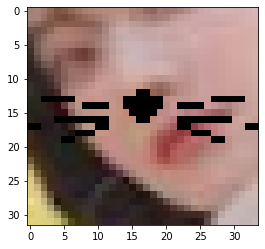

In [22]:
#maskÎ•º ÎßåÎì§Í∏∞ ÏúÑÌï¥ÏÑú Ïù¥ÎØ∏ÏßÄÎ•º grayÎ°ú Î≥ÄÍ≤Ω
mask_oh = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2GRAY)
#ret, mask = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

#bitwise_and Ïó∞ÏÇ∞ÏûêÎäî ÎëòÎã§ 0Ïù¥ ÏïÑÎãå Í≤ΩÏö∞Îßå Í∞íÏùÑ ÌÜµÍ≥º ÏãúÌÇ¥.
#Ï¶â maskÍ∞Ä Í≤ÄÏ†ïÏÉâÏù¥ ÏïÑÎãå Í≤ΩÏö∞Îßå ÌÜµÍ≥ºÍ∞Ä ÎêòÍ∏∞ÎïåÎ¨∏Ïóê maskÏòÅÏó≠ Ïù¥Ïô∏Îäî Î™®Îëê Ï†úÍ±∞Îê®.
sticker_area_oh = cv2.bitwise_and(sticker_area_oh, sticker_area_oh, mask=mask_oh)

print('sticker_area_oh')
plt.imshow(sticker_area_oh)
plt.show()

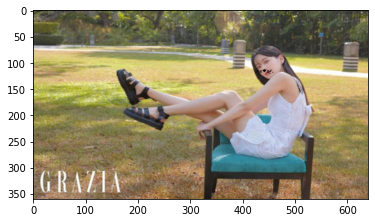

In [23]:
img_rgb_oh[refind_y_top:refind_y_bottom, refind_x_left:refind_x_right] = np.where(sticker_area_oh == 1, sticker_area_oh, sticker_area_oh).astype(np.uint8)
plt.imshow(img_rgb_oh)
plt.show()

> ÏñºÍµ¥Ïù¥ Í∏∞Ïö∏Ïñ¥ÏßÄÍ≥†, ÌÅ¥Î°úÏ¶à ÏïÑÏõÉÎêú Ïù¥ÎØ∏ÏßÄÏóêÏÑúÎèÑ ÏΩîÎÅùÏùÑ Ï§ëÏã¨ÏúºÎ°ú Ìïú Ï¢åÌëúÏÑ§Ï†ïÏù¥ Ïûò ÏûëÎèôÌïòÏòÄÎã§.

## ÌõÑÍ∏∞
-----

### ÎÇúÍ¥Ä 1. ÏñºÍµ¥Ïù∏ÏãùÏù¥ Ïò¨Î∞îÎ•¥Í≤å Ï†ÅÏö©ÎêòÎäî Ïù¥ÎØ∏ÏßÄÎ•º ÏàòÏßëÌïòÍ∏∞

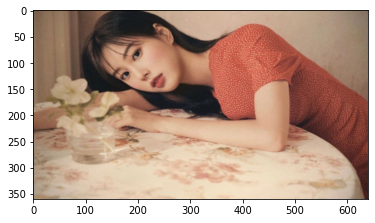

In [30]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/hyemmu1.png'
img_bgr = cv2.imread(my_image_path,cv2.IMREAD_UNCHANGED)    #- OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÏñ¥ÏÑú
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360Ïùò ÌÅ¨Í∏∞Î°ú Resize
img_show1 = img_bgr.copy()      #- Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄ Î≥ÑÎèÑ Î≥¥Í¥Ä
img_show1 = cv2.cvtColor(img_show1, cv2.COLOR_BGR2RGB)

# ÏõêÎ≥∏Ïù¥ÎØ∏ÏßÄ RGBÎ°ú Î≥ÄÍ≤Ω 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_show1) 
plt.show()

rectangles[]


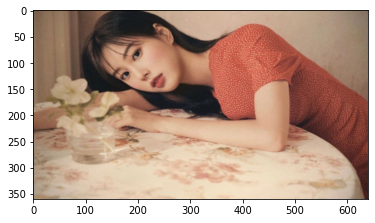

In [32]:
dlib_rects1 = detector_hog(img_show1, 1)

print(dlib_rects1)

for dlib_rect in dlib_rects1:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show1,(l,t), (r,b), (0, 255,0), 2, lineType=cv2.LINE_AA)
    
list_landmarks = []
# ÏÇ¨ÏßÑÏóêÏÑú ÏñºÍµ¥ Ïù∏ÏãùÌïòÏó¨ ÎûúÎìúÎßàÌÅ¨ Ï¢åÌëú ÏÉùÏÑ±
for dlib_rect in dlib_rects1:
    points = landmark_predictor(img_show1, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show1, point, 2, (0, 255, 255), -1) # yellow

# ÏÉùÏÑ±Îêú ÎûúÎìúÎßàÌÅ¨Î•º ÏÇ¨ÏßÑ ÏúÑÏóê ÌëúÌòÑ
plt.imshow(img_show1)
plt.show()    

ÏñºÍµ¥Ïù∏ÏãùÏóê Ïã§Ìå®ÌïòÏó¨ rectangles Í∞ùÏ≤¥Í∞Ä ÏïÑÎ¨¥Îü∞ ÏöîÏÜåÎèÑ Í∞ñÍ≥† ÏûàÏßÄ ÏïäÎã§.

#### Ïù¥Ï≤òÎüº ÏàòÏßëÌïú Ïù¥ÎØ∏ÏßÄÏóê ÏñºÍµ¥Ïù∏ÏãùÏùÑ ÏãúÎèÑÌïòÎã§Î≥¥Î©¥ Ïó¨Îü¨Í∞ÄÏßÄ Ïã§Ìå® ÏºÄÏù¥Ïä§Îì§Ïù¥ Î∞úÏÉùÌñàÎã§.

1. Ïù¥ÎØ∏ÏßÄ Î¶¨ÏÇ¨Ïù¥Ïßï Í≥ºÏ†ïÏóêÏÑú Í∞ÄÎ°úÏÑ∏Î°ú ÎπÑÏú® Ïú†ÏßÄ Ïã§Ìå®
2. rectangles Í∞ùÏ≤¥ ÏÉùÏÑ± Ïã§Ìå®
3. ÏñºÍµ¥Ïù¥ ÏïÑÎãå ÏúÑÏπòÏóê rectangles ÏÉùÏÑ±
4. ÏñºÍµ¥Ïùò ÏùºÎ∂ÄÎ∂ÑÏóêÎßå rectangles ÏÉùÏÑ±

4.Î≤àÏùò Í≤ΩÏö∞ ÏïûÏÑú Î∞òÎåÄÎ∞©Ìñ•ÏñºÍµ¥ Ïù∏Ïãù ÌÖåÏä§Ìä∏ÏóêÏÑúÏ≤òÎüº Ïù¥ÌõÑÏùò ÏûëÏóÖÏóê ÏßÄÏû•Ïù¥ ÏóÜÎäî Í≤ΩÏö∞ÎèÑ ÏûàÏóàÏúºÎÇò, 1~3Î≤àÏùò ÏºÄÏù¥Ïä§Îäî Í∑∏ Ïù¥ÌõÑÏùò Îã®Í≥ÑÎ°ú Ï†ÑÌòÄ ÏßÑÌñâÌï† Ïàò ÏóÜÍ≥†, 4Î≤àÏùò Í≤ΩÏö∞ÎèÑ ÎÜíÏùÄ ÌôïÎ•†Î°ú Îã§Ïùå Îã®Í≥ÑÎ°ú ÏßÑÌñâÌï† Ïàò ÏóÜÏóàÎã§. 

Ïù¥ÏôÄ Í∞ôÏùÄ Ïã§Ìå® ÏºÄÏù¥Ïä§Ïóê Ìï¥ÎãπÌïòÏßÄ ÏïäÎäî Ï†ïÏÉÅÏ†ÅÏù∏ ÏºÄÏù¥Ïä§Î•º Ï∞æÎäî Í≤ÉÏù¥ ÏÉùÍ∞Å Ïù¥ÏÉÅÏúºÎ°ú ÏãúÍ∞ÑÏù¥ Í±∏Î†∏ÎäîÎç∞, ÎßåÏïΩ **ÏïûÏúºÎ°ú ÏûàÏùÑ Ìï¥Ïª§ÌÜ§ÏóêÏÑú ÏñºÍµ¥Ïù∏ÏãùÏùÑ ÌôúÏö©Ìïú Ïñ¥ÌîåÎ¶¨ÏºÄÏù¥ÏÖòÏùÑ Í∞úÎ∞úÌïòÍ≤å ÎêúÎã§Î©¥ Î®ºÏ†Ä ÏñºÍµ¥Ïù∏ÏãùÏùò ÏÑ±Í≥µÎ•†ÏùÑ ÎÜíÏù¥Í∏∞ ÏúÑÌïú Î∞©ÏïàÏùÑ Ï∞æÎäî Í≤ÉÎ∂ÄÌÑ∞ ÏãúÏûëÌï¥Ïïº**Ìï† Í≤É Í∞ôÎã§. Ïù¥Î•º ÏúÑÌï¥ÏÑ† dlib.get_frontal_face_detectorÏóê ÎåÄÌïú ÌôïÏã§Ìïú Ïù¥Ìï¥Í∞Ä ÌïÑÏöîÌï† Í≤ÉÏù¥Îã§.

### ÎÇúÍ¥Ä 2. ÎÖ∏ÎìúÏùò ÏòàÏ†úÏΩîÎìú Ïù¥Ìï¥ÌïòÍ∏∞

Ïù¥Î≤à ÎÖ∏ÎìúÏóêÏÑúÎäî ÏòàÏ†úÏΩîÎìúÏùò ÏùòÎØ∏Î•º Ïù¥Ìï¥ÌïòÎäîÎç∞ Îß§Ïö∞ ÎßéÏùÄ ÏãúÍ∞ÑÏùÑ Ìï†Ïï†ÌñàÎã§.
ÌäπÌûà Ìï©ÏÑ±Ìï† Ïù¥ÎØ∏ÏßÄÏùò Í∏∞Ï§ÄÏ†êÏùÑ Ïû°Îäî Î∂ÄÎ∂ÑÏùò ÏΩîÎìúÏßÑÌñâÏùÑ Ïù¥Ìï¥ÌïòÎäîÎç∞ Í≥®Î®∏Î¶¨Î•º ÏïìÏïòÎã§.
ÌïúÎèôÏïà Ìó§Îß® ÎÅùÏóê ÏùòÎØ∏Í∞Ä Î∂ÑÎ™ÖÌïú Î≥ÄÏàòÎ™ÖÏùÑ ÏÉàÎ°ú Ìï†ÎãπÌïòÎäî Í≤ÉÎ∂ÄÌÑ∞ ÏãúÏûëÌï¥Î≥¥Îãà Ï°∞Í∏àÏî© Ïù¥Ìï¥Í∞Ä ÎêòÍ∏∞ ÏãúÏûëÌñàÎã§.




